In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def uv2psi(u,v):
    '''
    # FLOWFUN  Computes the potential PHI and the streamfunction PSI
    #     of a 2-dimensional flow defined by the matrices of velocity
    #     components U and V, so that
    #
    #           d(PHI)    d(PSI)          d(PHI)    d(PSI)
    #      u =  -----  -  ----- ,    v =  -----  +  -----
    #            dx        dy              dx        dy
    #
    #     For a potential (irrotational) flow  PSI = 0, and the laplacian
    #     of PSI is equal to the divergence of the velocity field.
    #     A non-divergent flow can be described by the streamfunction
    #     alone, and the laplacian of the streamfunction is equal to
    #     vorticity (curl) of the velocity field.
    #     The stepsizes dx and dy are assumed to equal unity.
    #   [PHI,PSI] = FLOWFUN(U,V), or in a complex form
    #   [PHI,PSI] = FLOWFUN(U+iV)
    #     returns matrices PHI and PSI of the same sizes as U and V,
    #     containing potential and streamfunction given by velocity
    #     components U, V.
    #     Because these potentials are defined up to the integration
    #     constant their absolute values are such that
    #     PHI(1,1) = PSI(1,1) = 0.
    #     If only streamfunction is needed, the flag can be used:
    #   PSI = FLOWFUN(U,V,FLAG), where FLAG can be a string:
    #     '-', 'psi', 'streamfunction' (abbreviations allowed).
    #     For the potential the FLAG can be  '+', 'phi', 'potential'.

    #  Uses command CUMSIMP (Simpson rule summation).

    #  Kirill K. Pankratov, March 7, 1994.
    '''
    phi = [];        # Create output
    psi = [];

    lx,ly = np.shape(u);  # Size of the velocity matrices

    # Now the main computations .........................................
    # Integrate velocity fields to get streamfunction
    # Use Simpson rule summation (function CUMSIMP)

     # Compute streamfunction PSI (solenoidal part)
    cx = cumsimp(v[0,:][:,None]);  # Compute x-integration constant
    cy = cumsimp(u[:,0][:,None]);  # Compute y-integration constant
    psi = -cumsimp(u)+cx[0];
    psi = (psi+cumsimp(v.T).T-cy[0])/2;

    return psi

def cumsimp(y):
    '''
    # F = CUMSIMP(Y)    Simpson-rule column-wise cumulative summation.
    #       Numerical approximation of a function F(x) such that 
    #       Y(X) = dF/dX.  Each column of the input matrix Y represents
    #       the value of the integrand  Y(X)  at equally spaced points
    #       X = 0,1,...size(Y,1).
    #       The output is a matrix  F of the same size as Y.
    #       The first row of F is equal to zero and each following row
    #       is the approximation of the integral of each column of matrix
    #       Y up to the givem row.
    #       CUMSIMP assumes continuity of each column of the function Y(X)
    #       and uses Simpson rule summation.
    #       Similar to the command F = CUMSUM(Y), exept for zero first
    #       row and more accurate summation (under the assumption of
    #       continuous integrand Y(X)).
    # 
    #    See also CUMSUM, SUM, TRAPZ, QUAD

    #  Kirill K. Pankratov, March 7, 1994.
    '''
    # 3-points interpolation coefficients to midpoints.
    # Second-order polynomial (parabolic) interpolation coefficients
    # from  Xbasis = [0 1 2]  to  Xint = [.5 1.5]
    c1 = 3/8; c2 = 6/8; c3 = -1/8;

    # Determine the size of the input and make column if vector
    ist = 0;         # If to be transposed
    lv = np.shape(y)[0];

    f = np.zeros_like(y);

    # If more than two elements in columns - Simpson summation
    num = np.arange(0,lv-2)
    # Interpolate values of Y to all midpoints
    f[num+1,:] = c1*y[num,:]+c2*y[num+1,:]+c3*y[num+2,:];
    f[num+2,:] = f[num+2,:]+c3*y[num,:]+c2*y[num+1,:]+c1*y[num+2,:];
    f[1,:] = f[1,:]*2; f[lv-1,:] = f[lv-1,:]*2;
    # Now Simpson (1,4,1) rule
    f[1:lv-1,:] = 2*f[1:lv-1,:]+y[0:lv-2,:]+y[1:lv-1,:];
    f = np.cumsum(f,0)/6;  # Cumulative sum, 6 - denom. from the Simpson rule

    return f

## Primeiro Teste

In [14]:
e = 2; g = 1;
x,y = np.meshgrid(np.arange(21),np.arange(16));  # This makes regular grid
u = e*x-g*y;                  # Linear velocity field
v = g*x-e*y;
psi = uv2psi(u,v);  # Here comes the potential and streamfun.

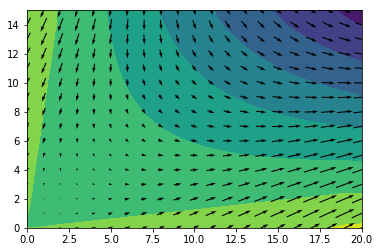

In [15]:
plt.figure()
plt.contourf(x,y,psi)
plt.quiver(x,y,u,v,pivot='mid')

## Segundo Teste

In [17]:
n = 50
X,Y = np.meshgrid(np.linspace(-2*np.pi,2*np.pi,n),np.linspace(-2*np.pi,2*np.pi,n))

U = np.sin(Y)
V = np.sin(X)

psi = uv2psi(U,V)


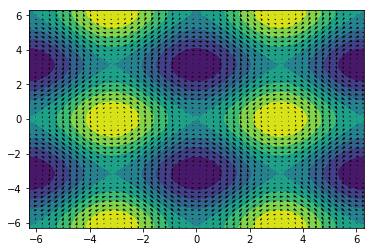

In [18]:
plt.figure()
plt.contourf(X,Y,psi)
plt.quiver(X,Y,U,V,pivot='mid')